In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imghdr
import warnings
warnings.filterwarnings('ignore')

In [2]:
image_extension = ['jpeg','jpg','png','bmp']

In [3]:
os.listdir('data')

['.ipynb_checkpoints', 'happy', 'sad']

In [4]:
dataset_dir= 'data'

In [5]:
#os.listdir(os.path.join(dataset_dir,'happy')) 

In [6]:
dataset_dir= 'data'
for imageclassnames in os.listdir(dataset_dir):
    for individualimage in os.listdir(os.path.join(dataset_dir,imageclassnames)):
        imagepath=os.path.join(dataset_dir,imageclassnames,individualimage)
        try:
            image = cv2.imread(imagepath)
            imagetag = imghdr.what(imagepath)
            if imagetag not in image_extension:
                print('Image Extention is not Correct{}'.format(imagepath))
                os.remove(imagepath)
                
        except Exception as e:
            print('The main issue is {} here,please solve this issue'.format(imagepath))

In [7]:
datasets = tf.keras.utils.image_dataset_from_directory(dataset_dir)

Found 305 files belonging to 3 classes.


In [8]:
datasets_iterate = datasets.as_numpy_iterator()

In [9]:
datasets_batch = datasets_iterate.next()

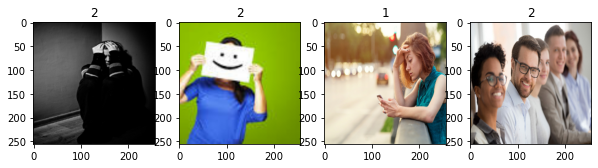

In [10]:
fig,ax = plt.subplots(ncols=4,figsize =(10,10))
for idx, image in enumerate(datasets_batch[0][10:14]):
    ax[idx].imshow(image.astype('int'))
    ax[idx].title.set_text(datasets_batch[1][idx])

In [11]:
def randomImageshow():
    datasets_batch = datasets_iterate.next()
    fig,ax = plt.subplots(ncols=4,figsize =(10,10))
    for idx, image in enumerate(datasets_batch[0][10:14]):
        ax[idx].imshow(image.astype('int'))
        ax[idx].title.set_text(datasets_batch[1][idx])

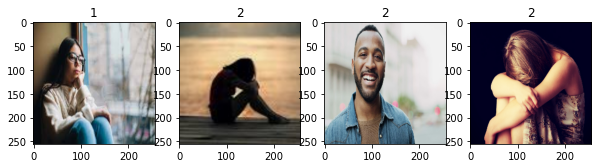

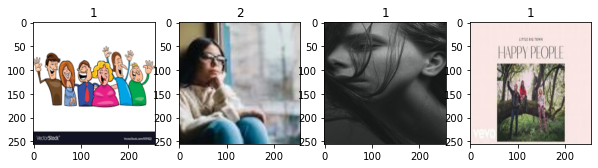

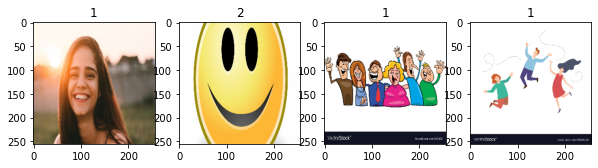

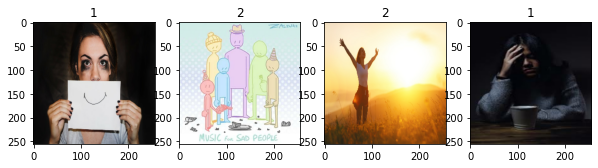

In [12]:
for i in range(4):
    randomImageshow()

In [13]:
datasetsScalling = datasets.map(lambda x,y:(x/255,y))

In [14]:
datasetsScalling.as_numpy_iterator().next()

(array([[[[5.37281334e-01, 4.70588237e-01, 2.90196091e-01],
          [5.37772954e-01, 4.75027889e-01, 2.82871008e-01],
          [5.25233865e-01, 4.70331877e-01, 2.84026742e-01],
          ...,
          [7.80780733e-01, 6.49642050e-01, 5.30663848e-01],
          [7.59745419e-01, 6.39218450e-01, 5.17287672e-01],
          [7.40778208e-01, 6.20397449e-01, 5.06376743e-01]],
 
         [[5.35891533e-01, 4.69224870e-01, 2.88832724e-01],
          [5.29771149e-01, 4.74869192e-01, 2.82712340e-01],
          [5.24358153e-01, 4.69224870e-01, 2.70589799e-01],
          ...,
          [7.84880519e-01, 6.55468762e-01, 5.28048396e-01],
          [7.60424912e-01, 6.46699429e-01, 5.22404075e-01],
          [7.42659628e-01, 6.27251863e-01, 5.12969375e-01]],
 
         [[5.36203563e-01, 4.73192394e-01, 2.81499177e-01],
          [5.33437431e-01, 4.77314681e-01, 2.77742028e-01],
          [5.32654285e-01, 4.74844307e-01, 2.78735220e-01],
          ...,
          [7.81410754e-01, 6.57827795e-01, 5.3043

In [15]:
traincatagory = int(len(datasets)*.7)
validationcatagory = int(len(datasets)*.2)
testcatagory = int(len(datasets)*.1)

In [16]:
train = datasetsScalling.take(traincatagory)
validation = datasetsScalling.skip(traincatagory).take(validationcatagory)
test = datasetsScalling.skip(traincatagory+validationcatagory).take(testcatagory)

In [17]:
from tensorflow.keras.layers import Dense,MaxPooling2D,Flatten,Dropout,Conv2D
from tensorflow.keras.models import Sequential

In [18]:
model = Sequential()
#input layer
model.add(Conv2D(16, kernel_size=(3,3), strides=1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Frist Hidden Layer
model.add(Conv2D(32, kernel_size=(3,3), strides=1,activation='relu'))
model.add(MaxPooling2D())
#Second Hidden Layer
model.add(Conv2D(64, kernel_size=(3,3), strides=1,activation='relu'))
model.add(MaxPooling2D())
# Bridge Layer
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation ='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [20]:
model.compile(optimizer='adam',loss='BinaryCrossentropy',metrics=['accuracy'])

In [26]:
os.makedirs('logs')

In [27]:
log_dir = 'logs'

In [28]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir = log_dir) 

In [29]:
history = model.fit(train,
                   epochs=20,
                   validation_data=validation,
                   callbacks=[tensorboard])

Epoch 1/20
7/7 [==============================] - 18s 2s/step - loss: -79.6997 - accuracy: 0.4420 - val_loss: -331.2396 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 17s 2s/step - loss: -1337.7322 - accuracy: 0.5045 - val_loss: -4118.0459 - val_accuracy: 0.4219
Epoch 3/20
7/7 [==============================] - 17s 2s/step - loss: -9042.3203 - accuracy: 0.4821 - val_loss: -21271.8008 - val_accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 17s 2s/step - loss: -44999.3789 - accuracy: 0.5089 - val_loss: -105027.3281 - val_accuracy: 0.3906
Epoch 5/20
7/7 [==============================] - 17s 2s/step - loss: -184067.8594 - accuracy: 0.4643 - val_loss: -297567.9062 - val_accuracy: 0.5000
Epoch 6/20
7/7 [==============================] - 17s 2s/step - loss: -486338.6562 - accuracy: 0.5179 - val_loss: -847876.3750 - val_accuracy: 0.5469
Epoch 7/20
7/7 [==============================] - 17s 2s/step - loss: -1352838.8750 - accuracy: 0.4866 - val_loss: 

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

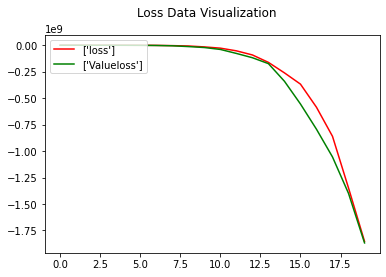

In [31]:
fig=plt.figure()
plt.plot(history.history['loss'],color = 'red', label=['loss'])
plt.plot(history.history['val_loss'],color = 'green', label=['Valueloss'])
plt.suptitle('Loss Data Visualization')
plt.legend(loc = 'upper left')
plt.show()

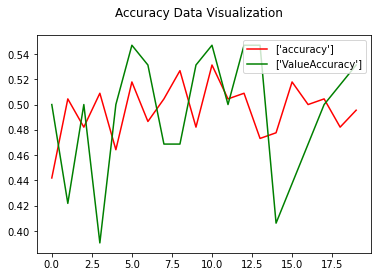

In [32]:
fig=plt.figure()
plt.plot(history.history['accuracy'],color = 'red', label=['accuracy'])
plt.plot(history.history['val_accuracy'],color = 'green', label=['ValueAccuracy'])
plt.suptitle('Accuracy Data Visualization')
plt.legend(loc = 'upper right')
plt.show()

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
Precision_Data = Precision()
Recall_Data = Recall()
Binary_Accuracy_Data = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator():
    x,y =batch
    y_predict = model.predict(x)
    Precision_Data(y,y_predict)
    Recall_Data(y,y_predict)
    Binary_Accuracy_Data(y,y_predict)

1/1 [==============================] - 0s 363ms/step


In [36]:
print(Precision_Data.result())
print(Recall_Data.result())
print(Binary_Accuracy_Data.result())


tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.4117647, shape=(), dtype=float32)


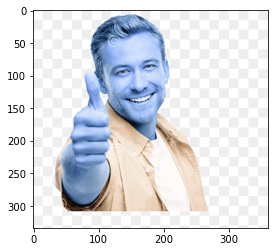

In [37]:
testImageData = cv2.imread('Smile_image.png')
plt.imshow(testImageData)
plt.show()

In [38]:
resizeImageData =tf.image.resize(testImageData,(256,256))

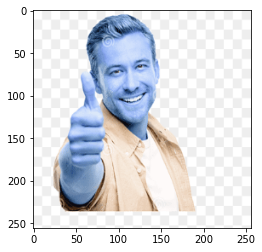

In [39]:
plt.imshow(resizeImageData.numpy().astype('int'))
plt.show()

In [40]:
testImageDataPredict = model.predict(np.expand_dims(resizeImageData/255,0))

1/1 [==============================] - 0s 42ms/step


In [41]:
if testImageDataPredict>0.5:
    print('Happy Image')
else:
    print('Sad Image')

Happy Image
